In [188]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [189]:
train_data = pd.read_excel("Data_Train.xlsx")
pd.set_option("display.max_columns",None)

In [190]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [191]:
train_data.shape

(10683, 11)

In [192]:
train_data.isnull().sum()/len(train_data.index)*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

<Axes: >

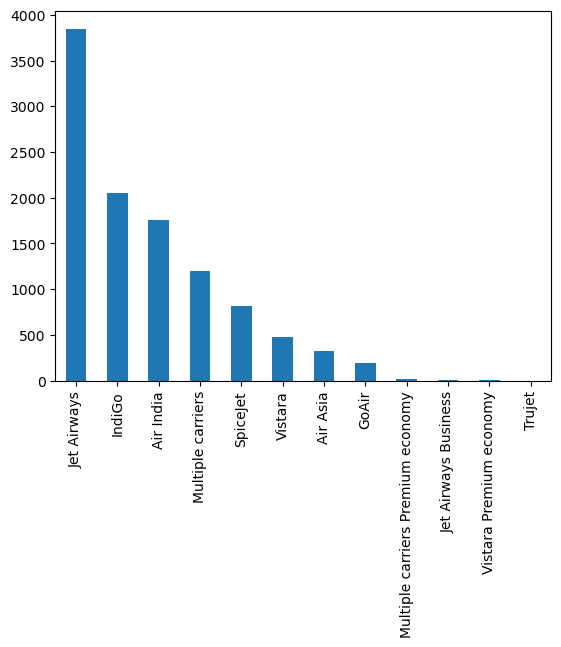

In [193]:
train_data.Airline.value_counts().plot(kind="bar")

In [194]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [195]:
train_data.dropna(inplace =True)

In [196]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [197]:
train_data["Date_of_Journey"][5]

'24/06/2019'

In [198]:
train_data["Journey_day"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [199]:
train_data.drop(["Date_of_Journey"],axis = 1,inplace =True)

In [200]:
train_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [201]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop(["Dep_Time"],axis =1, inplace =True)

In [202]:
train_data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [203]:
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute
train_data.drop(["Arrival_Time"],axis =1, inplace =True)

In [204]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [205]:
duration = list(train_data["Duration"])

for i, duration_str in enumerate(duration):
    if len(duration_str.split()) != 2:
        if "h" in duration_str:
            duration_str = duration_str.strip() + "0m"
        else:
            duration_str = "0h" + duration_str
    duration[i] = duration_str

duration_hours = []
duration_min = []

for i in range(len(duration)):
    hours, minutes = duration[i].split(sep="h")
    if "m" in minutes:
        minutes = minutes.split(sep="m")[0]
    else:
        minutes = 0
    duration_hours.append(int(hours))
    duration_min.append(int(minutes))


In [206]:
train_data["Duration_hours"] =duration_hours
train_data["Duration_mins"] = duration_min

In [207]:
train_data.drop(["Duration"],axis = 1 , inplace = True)

In [208]:
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [209]:
train_data.drop(["Route","Additional_Info"],axis = 1 ,inplace =True)

In [210]:
train_data["Total_Stops"] = train_data["Total_Stops"].map({
    "non-stop" : 0,
    "1 stop"   : 1,
    "2 stops"  : 2,
    "3 stops"  : 3,
    "4 stops"  : 4
})

In [211]:
train_data["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [212]:
X_train = train_data.drop(["Price"],axis = 1)
y_train = train_data["Price"]

In [213]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(transformers=[
    ("tf1", OneHotEncoder(sparse_output=True, drop="first"), ["Airline", "Source", "Destination"])
],remainder= "passthrough")

transformed_X_train = transformer.fit_transform(X_train)


In [214]:
transformed_X_train.shape

(10682, 29)

In [215]:
y_train

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [217]:
transformed_X_train

array([[ 0.,  0.,  1., ..., 10.,  2., 50.],
       [ 1.,  0.,  0., ..., 15.,  7., 25.],
       [ 0.,  0.,  0., ..., 25., 19.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 20.,  3.,  0.],
       [ 0.,  0.,  0., ..., 10.,  2., 40.],
       [ 1.,  0.,  0., ..., 15.,  8., 20.]])

In [222]:
test_data = pd.read_excel("Test_set.Xlsx")
test_data.drop(["Additional_Info","Route"],axis=1,inplace =True)
test_data["Journey_day"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"],axis = 1,inplace =True)
test_data["Arrival_hour"] = pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data.drop(["Arrival_Time"],axis =1, inplace =True)

In [224]:
duration = list(test_data["Duration"])

for i, duration_str in enumerate(duration):
    if len(duration_str.split()) != 2:
        if "h" in duration_str:
            duration_str = duration_str.strip() + "0m"
        else:
            duration_str = "0h" + duration_str
    duration[i] = duration_str

duration_hours = []
duration_min = []

for i in range(len(duration)):
    hours, minutes = duration[i].split(sep="h")
    if "m" in minutes:
        minutes = minutes.split(sep="m")[0]
    else:
        minutes = 0
    duration_hours.append(int(hours))
    duration_min.append(int(minutes))

In [226]:
test_data["Duration_hours"] =duration_hours
test_data["Duration_mins"] = duration_min
test_data.drop(["Duration"],axis = 1 , inplace = True)
test_data["Total_Stops"] = test_data["Total_Stops"].map({
    "non-stop" : 0,
    "1 stop"   : 1,
    "2 stops"  : 2,
    "3 stops"  : 3,
    "4 stops"  : 4
})

In [227]:
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"],axis =1, inplace =True)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,10,55,17,30
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,4,0,6,20
2,Jet Airways,Delhi,Cochin,1,21,5,19,0,23,45,19,15
3,Multiple carriers,Delhi,Cochin,1,21,5,21,0,13,0,8,0
4,Air Asia,Banglore,Delhi,0,24,6,2,45,2,50,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,20,25,23,55,20,30
2667,IndiGo,Kolkata,Banglore,0,27,3,16,55,2,35,14,20
2668,Jet Airways,Delhi,Cochin,1,6,3,4,25,6,35,21,50
2669,Air India,Delhi,Cochin,1,6,3,19,15,15,15,4,0


In [229]:
transformed_X_test = transformer.fit_transform(test_data)

In [230]:
transformed_X_test

array([[ 0.,  0.,  0., ..., 55., 17., 30.],
       [ 0.,  0.,  1., ...,  0.,  6., 20.],
       [ 0.,  0.,  0., ..., 45., 19., 15.],
       ...,
       [ 0.,  0.,  0., ..., 35., 21., 50.],
       [ 1.,  0.,  0., ..., 15.,  4.,  0.],
       [ 0.,  0.,  0., ..., 20.,  4., 55.]])

In [231]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(transformed_X_train,y_train,test_size=0.2,random_state=2023)

In [232]:
X_train.shape,X_test.shape

((8545, 29), (2137, 29))

In [243]:
from sklearn.linear_model import LinearRegression
lv = LinearRegression().fit(X_train,y_train)
y_pred = lv.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred,squared=False)
rmse = np.sqrt(mse)
print(rmse)

54.70198637975169


In [247]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
clf = linear_model.Lasso()
parameters = { "alpha" : [1,2,10,20,30,40,50,60,70,80,90,100,1000,50000]}
ridgecv = GridSearchCV(clf,parameters,scoring="neg_mean_squared_error",cv=5)
ridgecv.fit(X_train,y_train)

y_pred_clf = ridgecv.predict(X_test)

mse = mean_squared_error(y_test,y_pred_clf,squared=False)
rmse = np.sqrt(mse)
print(rmse)

54.712854819869534


In [251]:
from sklearn.linear_model import Ridge
Rd = Ridge()
parameters = { "alpha" : [1,2,10,20,30,40,50,60,70,80,90,100,1000,50000,24163353113]}
ridgecv = GridSearchCV(Rd,parameters,scoring="neg_mean_squared_error",cv=10)
ridgecv.fit(X_train,y_train)
y_pred_ridge = ridgecv.predict(X_test)

mse = mean_squared_error(y_test,y_pred_ridge,squared=False)
rmse = np.sqrt(mse)
print(rmse)

ridgecv.get_params


54.70354871667387


<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                   100, 1000, 50000, 24163353113]},
             scoring='neg_mean_squared_error')>

In [253]:
from sklearn.linear_model import ElasticNet
el = ElasticNet()
parameters = { "alpha" : [0.1,.02,.03,0.4,5000,10000,15000]}
elasticv = GridSearchCV(el,parameters,scoring="neg_mean_squared_error",cv=100)
elasticv.fit(X_train,y_train)
y_pred_elastic = elasticv.predict(X_test)

mse = mean_squared_error(y_test,y_pred_elastic,squared=False)
rmse = np.sqrt(mse)
print(rmse)



54.861616773652344


In [255]:
from sklearn.naive_bayes import GaussianNB
g = GaussianNB().fit(X_train,y_train)
y_pred_g = g.predict(X_test)

mse = mean_squared_error(y_test,y_pred_g,squared=False)
rmse = np.sqrt(mse)
print(rmse)


53.305564684603134


In [268]:
from sklearn.neighbors import KNeighborsRegressor
knn =KNeighborsRegressor(n_neighbors =5)

knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

mse = mean_squared_error(y_test,y_pred_knn,squared=False)
rmse = np.sqrt(mse)
print(rmse)



54.735282057147835


In [270]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

tree =DecisionTreeRegressor().fit(X_train,y_train)

y_pred_tree = tree.predict(X_test)

mse = mean_squared_error(y_test,y_pred_tree,squared=False)
rmse = np.sqrt(mse)
print(rmse)


51.01491835071022


In [274]:
parameters = { "criterion" : ["squared_error" , "friedman_mse"  ," absolute_error" , "poisson"],
             "splitter" : ["best" , "random"],
             "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12],
             "max_features" : ["auto","sqrt","log2"]}

regressorcv =GridSearchCV(tree,parameters,scoring="neg_mean_squared_error" , cv = 6)
regressorcv.fit(X_train,y_train)
y_pred_tree1 = regressorcv.predict(X_test)

mse = mean_squared_error(y_test,y_pred_tree1,squared=False)
rmse = np.sqrt(mse)
print(rmse)

C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
 

C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
 

C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
 

C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
 

C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
 

C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
 

C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
 

C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
 

C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
 

C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
 

C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
 

C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
 

49.440755089910944


C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1728.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Nitish Thakur\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Nitish Thakur\anacond

49.440755089910944

In [278]:
regressorcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 11,
 'max_features': 'auto',
 'splitter': 'random'}

In [286]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)
y_pred_reg = reg_rf.predict(X_test)

mse = mean_squared_error(y_test,y_pred_reg,squared=False)
rmse = np.sqrt(mse)
print(rmse)


45.74230245997974


In [280]:
import tensorflow as tf
from tensorflow import keras

In [290]:
model = keras.Sequential([
    keras.layers.Dense(3000,activation = "relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(100,activation ="relu"),
    keras.layers.Dense(10,activation ="relu"),
    keras.layers.Dense(1,activation ="relu")
])
model.compile(optimizer="adam",
              loss ="mse",
              metrics = ["mse",])
model.fit(X_train,y_train,epochs = 50)

Epoch 1/50
268/268 [==============================] - 7s 25ms/step - loss: 22163792.0000 - mse: 22163792.0000
Epoch 2/50
268/268 [==============================] - 6s 24ms/step - loss: 11438649.0000 - mse: 11438649.0000
Epoch 3/50
268/268 [==============================] - 7s 25ms/step - loss: 9456943.0000 - mse: 9456943.0000
Epoch 4/50
268/268 [==============================] - 6s 24ms/step - loss: 8789303.0000 - mse: 8789303.0000
Epoch 5/50
268/268 [==============================] - 6s 24ms/step - loss: 8140881.0000 - mse: 8140881.0000
Epoch 6/50
268/268 [==============================] - 6s 24ms/step - loss: 7570625.0000 - mse: 7570625.0000
Epoch 7/50
268/268 [==============================] - 6s 24ms/step - loss: 7289565.0000 - mse: 7289565.0000
Epoch 8/50
268/268 [==============================] - 6s 24ms/step - loss: 6882520.0000 - mse: 6882520.0000
Epoch 9/50
268/268 [==============================] - 6s 24ms/step - loss: 6635495.0000 - mse: 6635495.0000
Epoch 10/50
268/268 [===

In [291]:
predictions = model.predict(X_test)

67/67 [==============================] - 2s 5ms/step


In [292]:
mse = mean_squared_error(y_test,predictions,squared=False)
rmse = np.sqrt(mse)
print(rmse)


49.37513583824556


In [293]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.7134417677479754

For random forest


In [294]:
r2_score(y_test,y_pred_reg)

0.7889177277729814

we have maxmium r2 score for random forest and min rsme

In [295]:
import pickle

In [296]:
pickle.dump(train_data,open("data.pkl","wb"))

In [297]:
pickle.dump(reg_rf ,open("RandomForest.pkl","wb"))

In [300]:
train_data


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40
